In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
all_data = pd.read_feather(r'D:\University\7th semester\Data analysis\Sales_data.ftr')

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data.shape

(186850, 6)

In [7]:
all_data = all_data.dropna(how= 'all')

In [8]:
all_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [9]:
all_data.shape

(186305, 6)

In [10]:
all_data = all_data.drop_duplicates()

In [11]:
all_data.shape

(185687, 6)

In [12]:
all_data['Order Date'][0].split('/')[0]

'04'

In [13]:
def return_month(x):
    return x.split('/')[0]

In [14]:
all_data['Month'] = all_data['Order Date'].apply(return_month)

In [15]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [16]:
all_data['Month'].unique()

array(['04', '05', 'Order Date', '08', '09', '12', '01', '02', '03', '07',
       '06', '11', '10'], dtype=object)

In [17]:
filter1 = all_data['Month'] == 'Order Date'

In [18]:
all_data[filter1]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Date


In [19]:
all_data = all_data[~filter1]

In [20]:
all_data[filter1]

C:\Users\Mohammed R. Alshaer\AppData\Local\Temp\ipykernel_14248\2629320732.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  all_data[filter1]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month


In [21]:
all_data['Month'] = all_data['Month'].astype(int)

In [22]:
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = all_data['Price Each'].astype(float)

In [23]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

<Axes: xlabel='Month'>

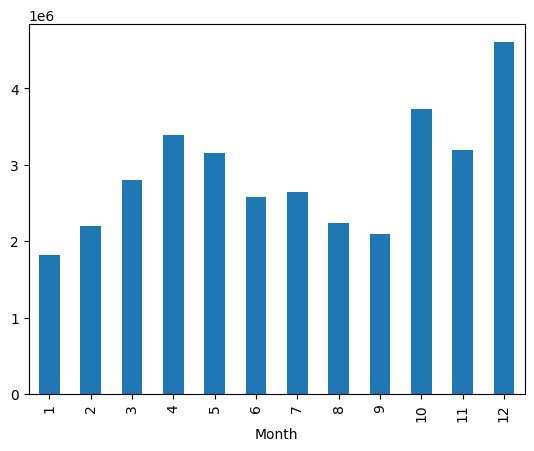

In [24]:
all_data.groupby(['Month'])['Sales'].sum().plot(kind = 'bar')

In [25]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str.get(1)

In [26]:
all_data['City']

0                 Dallas
2                 Boston
3            Los Angeles
4            Los Angeles
5            Los Angeles
               ...      
186845       Los Angeles
186846     San Francisco
186847     San Francisco
186848     San Francisco
186849     San Francisco
Name: City, Length: 185686, dtype: object

In [27]:
all_data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco


C:\Users\Mohammed R. Alshaer\AppData\Local\Temp\ipykernel_14248\3048825091.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(all_data['City']).plot(kind= 'pie', autopct = '%1.0f%%')


<Axes: ylabel='count'>

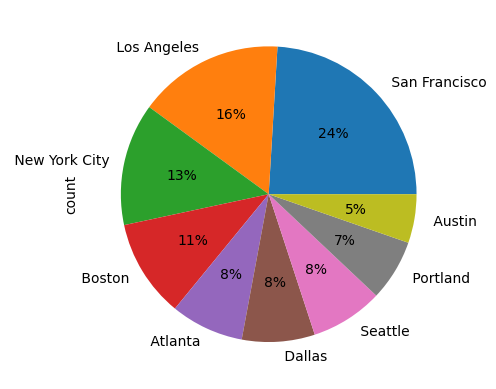

In [28]:
pd.value_counts(all_data['City']).plot(kind= 'pie', autopct = '%1.0f%%')

In [29]:
count_df = all_data.groupby(['Product']).agg({'Quantity Ordered':'sum', 'Price Each': 'mean'})

In [37]:
products = count_df['Product'].values

In [35]:
count_df = count_df.reset_index()

C:\Users\Mohammed R. Alshaer\AppData\Local\Temp\ipykernel_14248\2203994372.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(products, rotation = 'vertical', fontsize=8)


Text(0, 0.5, 'Avg price of product')

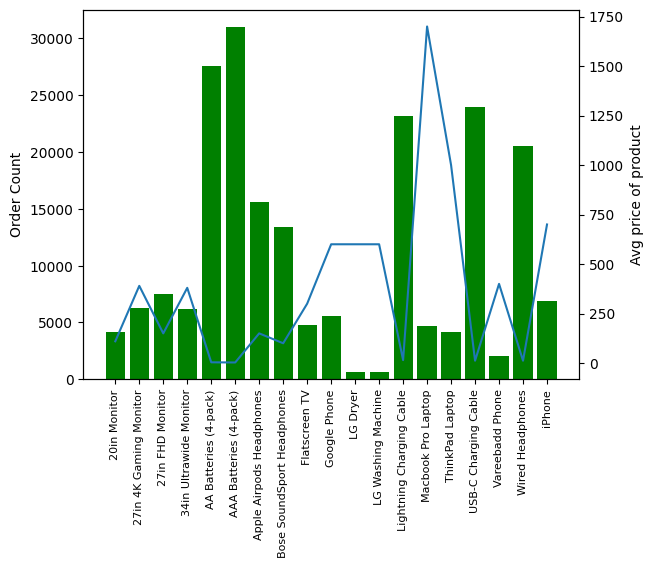

In [40]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(count_df['Product'], count_df['Quantity Ordered'], color = 'g')
ax2.plot(count_df['Product'], count_df['Price Each'])
ax1.set_xticklabels(products, rotation = 'vertical', fontsize=8)
ax1.set_ylabel('Order Count')
ax2.set_ylabel('Avg price of product')

In [42]:
most_sold_products = all_data['Product'].value_counts()[0:5].index

In [44]:
filter2 = all_data['Product'].isin(most_sold_products)

In [46]:
most_sold_products_df = all_data[filter2]

In [47]:
most_sold_products_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta


In [48]:
pivot = most_sold_products_df.groupby(['Month', 'Product']).size().unstack()

<Axes: xlabel='Month'>

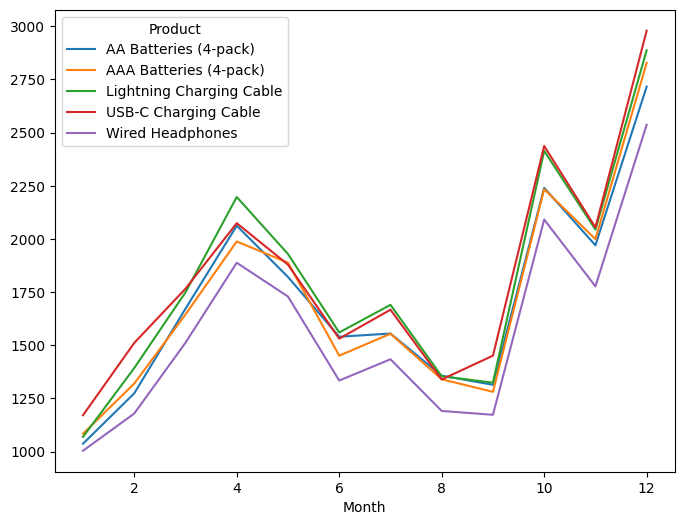

In [50]:
pivot.plot(figsize=(8,6))

In [51]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [54]:
df_duplicated = all_data[all_data['Order ID'].duplicated(keep= False)]

In [67]:
dup_products = df_duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ','.join (x)).reset_index().rename(columns={'Product':'Grouped Products'})

In [71]:
dup_products_df = df_duplicated.merge(dup_products, how='left', on= 'Order ID')

In [72]:
dup_products_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Grouped Products
0,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,Wired Headphones"
1,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,"Google Phone,Wired Headphones"
2,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,"Google Phone,USB-C Charging Cable"
3,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,"Google Phone,USB-C Charging Cable"
4,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco,"AAA Batteries (4-pack),Google Phone"


In [73]:
no_dup_df = dup_products_df.drop_duplicates(subset=['Order ID'])

In [74]:
no_dup_df.shape

(6879, 10)

<Axes: ylabel='count'>

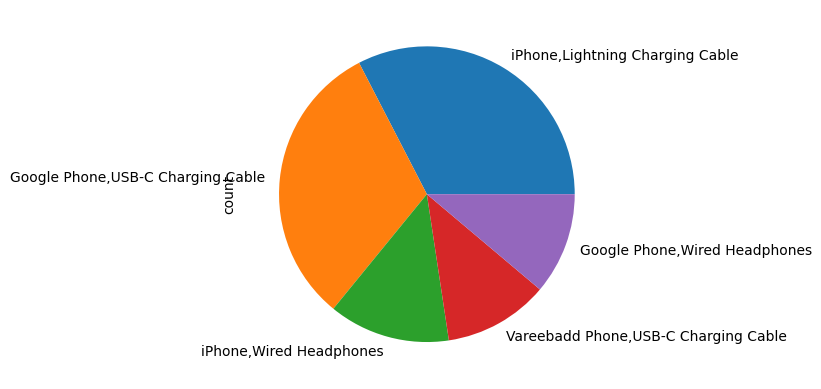

In [76]:
no_dup_df['Grouped Products'].value_counts()[0:5].plot.pie()